# Species that I selected are:
- Cyprinus Carpio
- Rattus Norvegicus
- Parus major

In [ ]:
#!pip install Bio
#!pip install codon-bias
#!pip install cai2

# Required Libraries to fulfill the tasks required

In [ ]:
from Bio import SeqIO
import codonbias as cb
import cai2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Codon Frequencies


In [ ]:

# Define codon usage frequencies for four different species
# Fish
CU_Cyprinus_carpio = {
    'UUU': 17.2, 'UUC': 23.8, 'UUA': 5.5, 'UUG': 11.5,
    'UCU': 15.6, 'UCC': 14.3, 'UCA': 11.9, 'UCG': 4.2,
    'UAU': 12.8, 'UAC': 19.6, 'UAA': 1.2, 'UAG': 0.5,
    'UGU': 11.9, 'UGC': 11.9, 'UGA': 1.0, 'UGG': 11.5,
    'CUU': 12.6, 'CUC': 17.2, 'CUA': 5.1, 'CUG': 37.8,
    'CCU': 14.9, 'CCC': 12.3, 'CCA': 14.4, 'CCG': 6.2,
    'CAU': 9.9, 'CAC': 13.6, 'CAA': 11.9, 'CAG': 32.5,
    'CGU': 7.2, 'CGC': 7.4, 'CGA': 4.7, 'CGG': 4.7,
    'AUU': 17.4, 'AUC': 26.4, 'AUA': 7.1, 'AUG': 27.0,
    'ACU': 15.7, 'ACC': 17.6, 'ACA': 15.6, 'ACG': 6.2,
    'AAU': 16.1, 'AAC': 25.0, 'AAA': 29.3, 'AAG': 36.0,
    'AGU': 11.5, 'AGC': 17.5, 'AGA': 14.0, 'AGG': 9.5,
    'GUU': 15.1, 'GUC': 17.1, 'GUA': 6.4, 'GUG': 29.2,
    'GCU': 24.0, 'GCC': 20.5, 'GCA': 15.3, 'GCG': 7.4,
    'GAU': 26.4, 'GAC': 28.3, 'GAA': 24.0, 'GAG': 43.1,
    'GGU': 16.4, 'GGC': 17.4, 'GGA': 21.1, 'GGG': 9.2
}
# Mammal
CU_Rattus_norvegicus = {
    'UUU': 16.5, 'UUC': 23.1, 'UUA': 5.9, 'UUG': 12.8,
    'UCU': 14.8, 'UCC': 17.8, 'UCA': 10.9, 'UCG': 4.4,
    'UAU': 11.6, 'UAC': 17.1, 'UAA': 0.6, 'UAG': 0.5,
    'UGU': 9.8, 'UGC': 11.9, 'UGA': 1.2, 'UGG': 13.2,

    'CUU': 12.5, 'CCU': 17.4, 'CAU': 9.5, 'CGU': 5.0,
    'CUC': 20.4, 'CCC': 18.0, 'CAC': 14.9, 'CGC': 9.8,
    'CUA': 7.6, 'CCA': 16.1, 'CAA': 11.1, 'CAG': 33.8,
    'CGA': 6.8, 'CGG': 10.9, 'CUG': 41.1, 'CCG': 6.3,

    'AUU': 15.3, 'ACU': 12.9, 'AAU': 15.1, 'AGU': 11.8,
    'AUC': 24.4, 'ACC': 19.7, 'AAC': 21.7, 'AGC': 19.2,
    'AUA': 6.9, 'ACA': 15.3, 'AAA': 21.5, 'AGA': 11.2,
    'AGG': 11.8, 'AUG': 23.1, 'ACG': 6.2, 'AAG': 35.1,

    'GUU': 10.4, 'GCU': 19.7, 'GAU': 20.9, 'GGU': 11.4,
    'GUC': 16.2, 'GCC': 27.1, 'GAC': 28.0, 'GGC': 21.9,
    'GUA': 7.2, 'GCA': 15.6, 'GAA': 26.9, 'GGA': 16.6,
    'GUG': 30.0, 'GCG': 6.9, 'GAG': 41.3, 'GGG': 15.6
}
# Bird
CU_Parus_Major = {
    'UUU': 10.9, 'UUC': 41.0, 'UUA': 0.0, 'UUG': 10.9,
    'UCU': 0.0, 'UCC': 30.1, 'UCA': 0.0, 'UCG': 0.0,
    'UAU': 10.9, 'UAC': 27.3, 'UAA': 0.0, 'UAG': 0.0,
    'UGU': 10.9, 'UGC': 32.8, 'UGA': 2.7, 'UGG': 13.7,
    'CUU': 2.7, 'CUC': 57.4, 'CUA': 2.7, 'CUG': 51.9,
    'CCU': 10.9, 'CCC': 21.9, 'CCA': 16.4, 'CCG': 10.9,
    'CAU': 2.7, 'CAC': 19.1, 'CAA': 10.9, 'CAG': 13.7,
    'CGU': 2.7, 'CGC': 8.2, 'CGA': 2.7, 'CGG': 27.3,
    'AUU': 5.5, 'AUC': 51.9, 'AUA': 8.2, 'AUG': 24.6,
    'ACU': 8.2, 'ACC': 32.8, 'ACA': 5.5, 'ACG': 5.5,
    'AAU': 2.7, 'AAC': 43.7, 'AAA': 2.7, 'AAG': 24.6,
    'AGU': 5.5, 'AGC': 24.6, 'AGA': 5.5, 'AGG': 10.9,
    'GUU': 2.7, 'GUC': 46.4, 'GUA': 0.0, 'GUG': 38.3,
    'GCU': 19.1, 'GCC': 51.9, 'GCA': 0.0, 'GCG': 2.7,
    'GAU': 8.2, 'GAC': 16.4, 'GAA': 5.5, 'GAG': 21.9,
    'GGU': 5.5, 'GGC': 30.1, 'GGA': 16.4, 'GGG': 19.1
}

def convert_codon_usage_table_to_dna(codon_usage_table):
    return {key.replace('U', 'T'): value for key, value in codon_usage_table.items()}
CU_Cyprinus_carpio = convert_codon_usage_table_to_dna(CU_Cyprinus_carpio)
CU_Parus_Major = convert_codon_usage_table_to_dna(CU_Parus_Major)
CU_Rattus_norvegicus = convert_codon_usage_table_to_dna(CU_Rattus_norvegicus)

### Effective Number of Codons (Nc)

The **Effective Number of Codons (Nc)** is a measure of the bias in codon usage. It quantifies how evenly the synonymous codons are distributed in the coding sequence of a gene.

#### Formula:

$
\text{Nc} = 20 - \frac{\sum_{i=1}^{61} f_i^2}{\sum_{i=1}^{61} f_i}
$

Where:
- $f_i $is the frequency of the $ i^{th} $ codon (for amino acids, excluding stop codons).
- The sum is taken over the **61** codons corresponding to amino acids.

### Interpretation:
- **Nc = 61**: No codon usage bias (even distribution of codons).
- **Nc = 20**: Maximum codon usage bias (one codon used per amino acid).


# Calculating GC Content and GC Positions

In [ ]:
# Calculate GC content
def calc_gc_content(sequence):
    if len(sequence) == 0:  # Check if sequence is empty
        return 0.0  # Return 0% GC content if sequence is empty
    g = sequence.count('G')
    c = sequence.count('C')
    return (g + c) / len(sequence) * 100

# Function to calculate GC% at each codon position (GC1, GC2, GC3)
def calc_gc_positions(sequence):
    if len(sequence) == 0:  # Check if sequence is empty
        return 0.0, 0.0, 0.0  # Return zero values if sequence is empty
    gc1, gc2, gc3 = 0, 0, 0
    for i in range(0, len(sequence), 3):
        codon = sequence[i:i+3]
        if len(codon) == 3:  # Ignore incomplete codons
            if codon[0] in 'GC':
                gc1 += 1
            if codon[1] in 'GC':
                gc2 += 1
            if codon[2] in 'GC':
                gc3 += 1
    total_codons = len(sequence) // 3
    return (gc1 / total_codons) * 100, (gc2 / total_codons) * 100, (gc3 / total_codons) * 100


# Reading Files
In this below code I am reading all the fasta files and creating dataframes and csv tables after calculating the required columns such as GC content, ENC, CAI and length of sequence.
Note: In this part I am excluding those sequences which are shorter than the length of 100

In [ ]:
def process_fasta(fasta_file, reference_table):
    # Read the FASTA file
    records = SeqIO.parse(fasta_file, "fasta")

    # List to store the data
    data = []

    # Process each sequence
    for record in records:
        header = record.description  # This contains the full header info (including CDS ID, gene, etc.)
        sequence = str(record.seq)  # The actual gene sequence

        # Check if the sequence length is at least 100
        if len(sequence) < 100:
            continue  # Skip sequences shorter than 100 base pairs

        # Extract CDS ID from the header (first part before space)
        cds_id = header.split()[0]

        # Calculate required metrics
        length = len(sequence)
        gc_content = calc_gc_content(sequence)
        enc= cb.scores.EffectiveNumberOfCodons().get_score(sequence)
        cai = cb.scores.CodonAdaptationIndex(reference_table).get_score(sequence)
        gc1, gc2, gc3 = calc_gc_positions(sequence)

        # Add the data to the list
        data.append([cds_id, length, gc_content, enc,cai,  gc1, gc2, gc3])

    # Convert the list to a DataFrame
    df = pd.DataFrame(data, columns=['cds ID', 'cds length (bp)', 'GC%', 'ENC','CAI',  'GC1', 'GC2', 'GC3'])

    return df


In [ ]:

# Define your file paths for the four species
fasta_files = {
     "Cyprinus Carpio": "/content/Cyprinus_carpio_carpio.Cypcar_WagV4.0.cds.all.fa",
    "Rattus Norvegicus": "/content/Parus_major.Parus_major1.1.cds.all.fa",
    "Parus major": "/content/Rattus_norvegicus.mRatBN7.2.cds.all.fa"
}

# Define the codon usage for each species
codon_usages = {
    "Cyprinus Carpio": CU_Cyprinus_carpio,
    "Rattus Norvegicus": CU_Rattus_norvegicus,
    "Parus major": CU_Parus_Major
}



# Initialize an empty dictionary to store DataFrames
dfs = {}

# Process each FASTA file with its corresponding codon usage and store the DataFrame in the dictionary
for species, fasta_file in fasta_files.items():
    codon_usage_dict = codon_usages[species]  # Get the appropriate codon usage for each species
    df = process_fasta(fasta_file, codon_usage_dict)
    dfs[species] = df  # Store the resulting DataFrame with the species name as the key

# Optionally, save all DataFrames as CSV files
for species, df in dfs.items():
    df.to_csv(f'{species}_output.csv', index=False)

print("CSV files have been generated successfully!")

# Separate the dataframse
I will separate one big dataframe and extract dataframes for all species. And then I will also concat these dataframes to create a big concated dataframe with a label colum species to do the clustering

In [ ]:
df_Parus_major = dfs['Parus major']
df_Rattus_Norvegicus = dfs['Rattus Norvegicus']
df_Cyprinus_Carpio = dfs['Cyprinus Carpio']

In [ ]:
df_Parus_major = pd.read_csv("/content/Parus_major_output.csv")
df_Rattus_Norvegicus = pd.read_csv("/content/Rattus_Norvegicus_output.csv")
df_Cyprinus_Carpio = pd.read_csv("/content/Cyprinus_Carpio_output.csv")

In [ ]:
# Combine all species DataFrames into one DataFrame
df_Rattus_Norvegicus['Species'] = 'Rattus_Norvegicus'
df_Cyprinus_Carpio['Species'] = 'Cyprinus_Carpio'
df_Parus_major['Species'] = 'Parus_major'
combined_df = pd.concat([df_Rattus_Norvegicus[['Species', 'cds length (bp)', 'GC%', 'ENC', 'CAI', 'GC1', 'GC2', 'GC3']],
                         df_Cyprinus_Carpio[['Species', 'cds length (bp)', 'GC%', 'ENC', 'CAI', 'GC1', 'GC2', 'GC3']],
                         df_Parus_major[['Species', 'cds length (bp)', 'GC%', 'ENC', 'CAI', 'GC1', 'GC2', 'GC3']]])


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218951 entries, 0 to 27487
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Species          218951 non-null  object 
 1   cds length (bp)  218951 non-null  int64  
 2   GC%              218951 non-null  float64
 3   ENC              218951 non-null  float64
 4   CAI              218951 non-null  float64
 5   GC1              218951 non-null  float64
 6   GC2              218951 non-null  float64
 7   GC3              218951 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.0+ MB


# EDA
Visalize the table I can see that the values for all columsn are correct. However, ENC is in the range and CAI as well.

As all the sequences with length 100 are already excluded so we don't need to do that step here.

I have also checked for Nan values non exist in this case however there are few outliers which I haven't removed as I am not sure what effect would those make in this case.

In [ ]:
def check_null_values(df):
    null_values = df.isnull().sum()
    null_percent = (df.isnull().mean()) * 100
    return pd.DataFrame({'Null Values': null_values, 'Null Percentage': null_percent})

# 2. Checking for outliers using IQR method
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

    return pd.DataFrame.from_dict(outliers, orient='index', columns=['Outliers'])

# Check for null values
null_values_df = check_null_values(combined_df)
print("Null Values in combined_df:")
print(null_values_df)

# Check for outliers
outliers_df = detect_outliers(combined_df)
print("\nOutliers in combined_df:")
print(outliers_df)

Null Values in combined_df:
                 Null Values  Null Percentage
Species                    0              0.0
cds length (bp)            0              0.0
GC%                        0              0.0
ENC                        0              0.0
CAI                        0              0.0
GC1                        0              0.0
GC2                        0              0.0
GC3                        0              0.0

Outliers in combined_df:
                 Outliers
cds length (bp)     12762
GC%                  4914
ENC                 10490
CAI                     0
GC1                  7531
GC2                  5512
GC3                  3537


# Remove outliers
Here is the step to remove outliers but I am not removing them for now as it didn't affect any of the resutls and I am not sure if it is wise to remove them as the length and the range of values depend on sequence which is not bascically a garbage value to be removed

In [ ]:
def remove_outliers_iqr(df, column):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data to remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return filtered_df
columns_to_check = ['ENC', 'GC%', 'CAI', 'GC1', 'GC2', 'GC3']  # example columns

# Remove outliers for each column
#for column in columns_to_check:
#    df = remove_outliers_iqr(combined_df, column)

# Add Average of GC1 and GC2 columns GC12

In [ ]:
combined_df['GC12'] = (combined_df['GC1'] + combined_df['GC2']) / 2

# GC Content
To create a histogram for each of the GC content columns (i.e., GC%, GC1, GC2, GC3) for each species. The idea is to loop through the Species column and generate a histogram for each species, showing the distribution of GC%, GC1, GC2, and GC3.

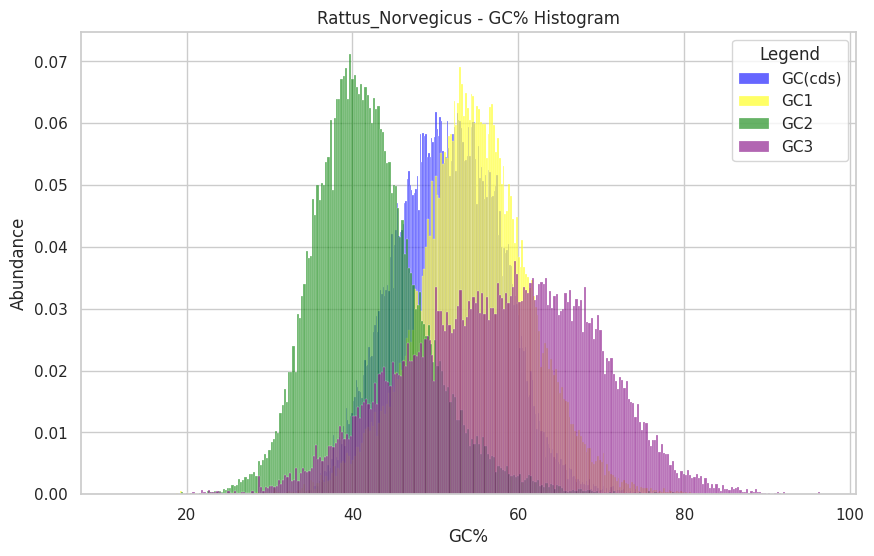

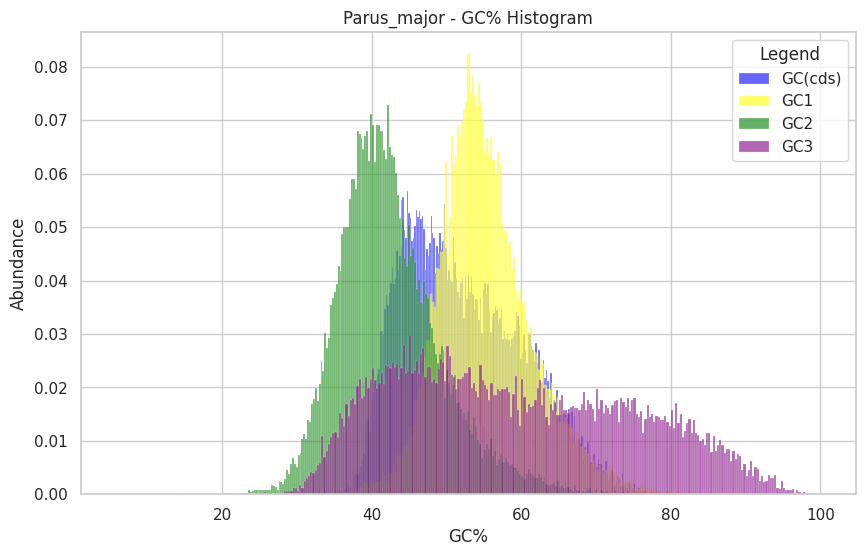

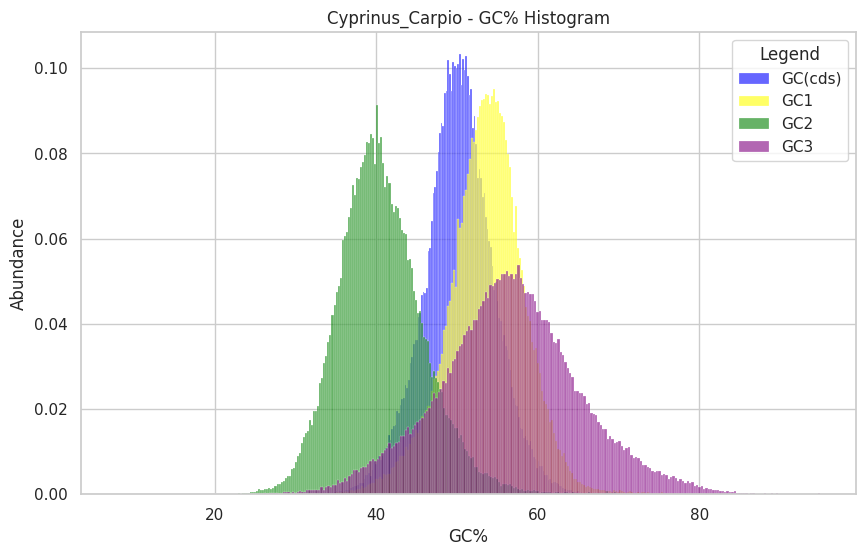

In [ ]:
# Define function to plot histograms for a specific species
def plot_gc_histogram_for_species(df, species_name):
    # Filter the data for the specific species
    species_data = df[df['Species'] == species_name]

    # Plot histogram for GC%, GC1, GC2, GC3
    plt.figure(figsize=(10, 6))
    sns.histplot(species_data['GC%'], label='GC(cds)', color='blue', bins=300, stat='density',alpha = 0.6)
    sns.histplot(species_data['GC1'], label='GC1', color='yellow', bins=300, stat='density',alpha = 0.6)
    sns.histplot(species_data['GC2'], label='GC2', color='green', bins=300, stat='density',alpha = 0.6)
    sns.histplot(species_data['GC3'], label='GC3', color='purple', bins=300, stat='density',alpha = 0.6)

    # Title and labels
    plt.title(f"{species_name} - GC% Histogram")
    plt.xlabel("GC%")
    plt.ylabel("Abundance")
    plt.legend(title="Legend", loc='upper right')
    plt.grid(True)
    plt.show()

# Specify the species you want to plot (e.g., 'Homo sapiens')
species_name = ['Rattus_Norvegicus','Parus_major','Cyprinus_Carpio']  # Replace with the species name you want to plot
for species in species_name:
  plot_gc_histogram_for_species(combined_df, species)

# Relationship between important genomic features

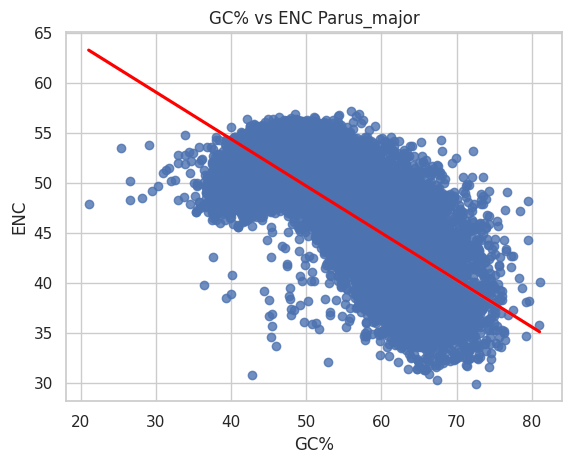

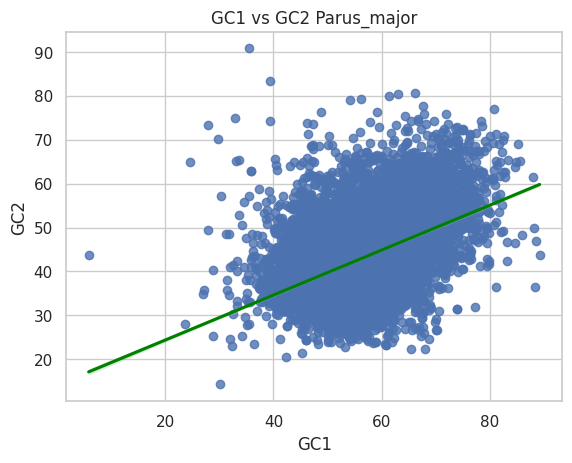

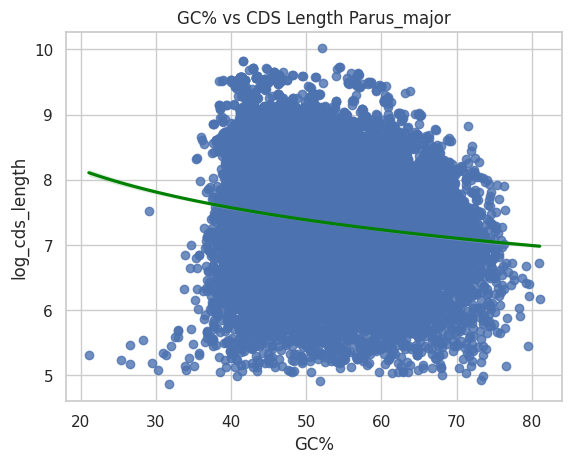

In [ ]:
# Scatter plot for GC% vs ENC with regression line
sns.regplot(x='GC%', y='ENC', data=combined_df[combined_df['Species'] == 'Parus_major'], line_kws={'color': 'red'})
plt.title("GC% vs ENC Parus_major")
plt.show()

# Scatter plot for GC1 vs GC2 with regression line
sns.regplot(x='GC1', y='GC2', data=combined_df[combined_df['Species'] == 'Parus_major'], line_kws={'color': 'green'})
plt.title("GC1 vs GC2 Parus_major")
plt.show()


# Scatter plot for GC% vs cds length with regression line
combined_df['log_cds_length'] = np.log(combined_df['cds length (bp)'])
sns.regplot(x='GC%', y='log_cds_length', data=combined_df[combined_df['Species'] == 'Parus_major'], line_kws={'color': 'green'}, logx=True)
plt.title("GC% vs CDS Length Parus_major")
plt.show()


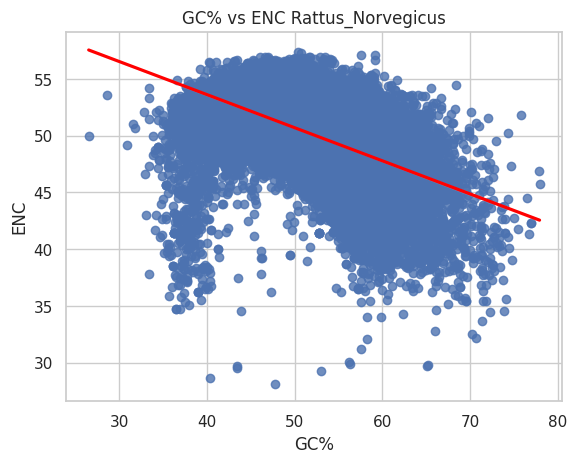

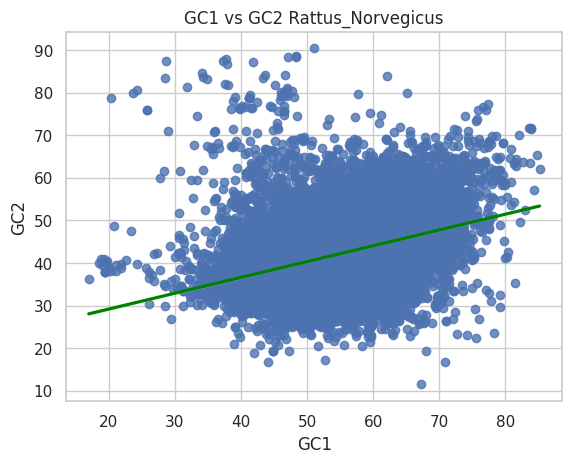

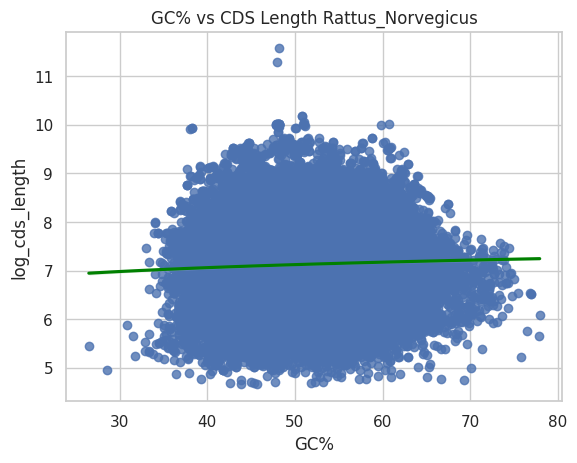

In [ ]:
# Scatter plot for GC% vs ENC with regression line
sns.regplot(x='GC%', y='ENC', data=combined_df[combined_df['Species'] == 'Rattus_Norvegicus'], line_kws={'color': 'red'})
plt.title("GC% vs ENC Rattus_Norvegicus")
plt.show()

# Scatter plot for GC1 vs GC2 with regression line
sns.regplot(x='GC1', y='GC2', data=combined_df[combined_df['Species'] == 'Rattus_Norvegicus'], line_kws={'color': 'green'})
plt.title("GC1 vs GC2 Rattus_Norvegicus")
plt.show()


# Scatter plot for GC% vs cds length with regression line
sns.regplot(x='GC%', y='log_cds_length', data=combined_df[combined_df['Species'] == 'Rattus_Norvegicus'], line_kws={'color': 'green'}, logx=True)
plt.title("GC% vs CDS Length Rattus_Norvegicus")
plt.show()

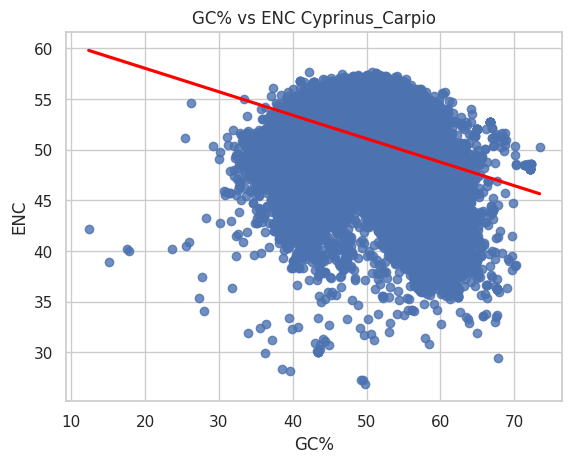

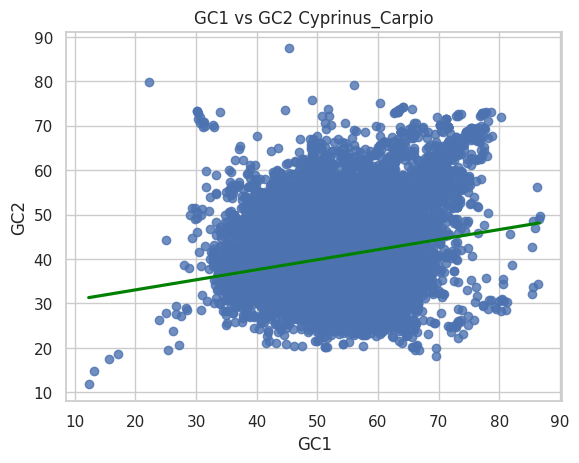

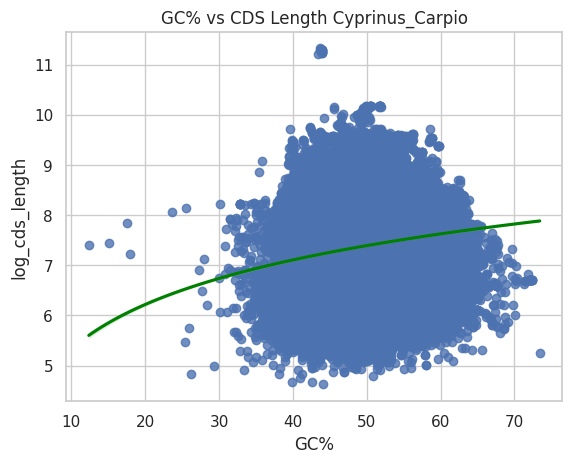

In [ ]:
# Scatter plot for GC% vs ENC with regression line
sns.regplot(x='GC%', y='ENC', data=combined_df[combined_df['Species'] == 'Cyprinus_Carpio'], line_kws={'color': 'red'})
plt.title("GC% vs ENC Cyprinus_Carpio")
plt.show()

# Scatter plot for GC1 vs GC2 with regression line
sns.regplot(x='GC1', y='GC2', data=combined_df[combined_df['Species'] == 'Cyprinus_Carpio'], line_kws={'color': 'green'})
plt.title("GC1 vs GC2 Cyprinus_Carpio")
plt.show()

# Scatter plot for GC% vs cds length with regression line
sns.regplot(x='GC%', y='log_cds_length', data=combined_df[combined_df['Species'] == 'Cyprinus_Carpio'], line_kws={'color': 'green'}, logx=True)
plt.title("GC% vs CDS Length Cyprinus_Carpio")
plt.show()

# Nutrality Plot
A neutrality plot helps assess the genetic diversity of a population and determine whether observed patterns are consistent with neutral evolution.

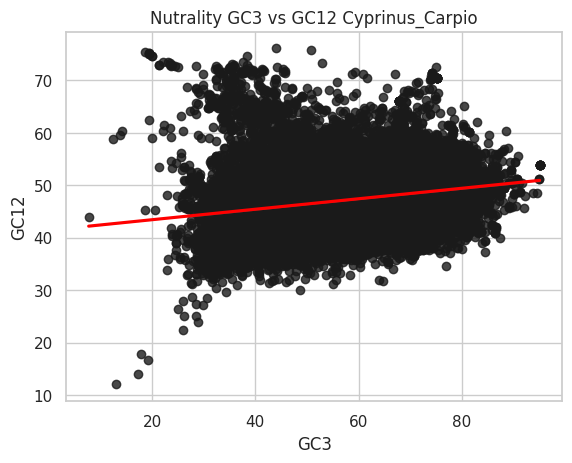

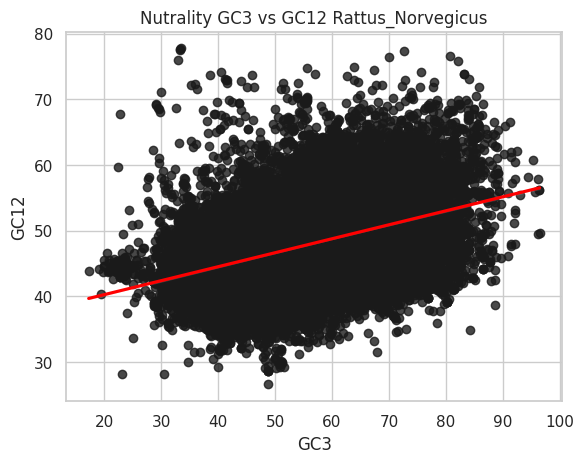

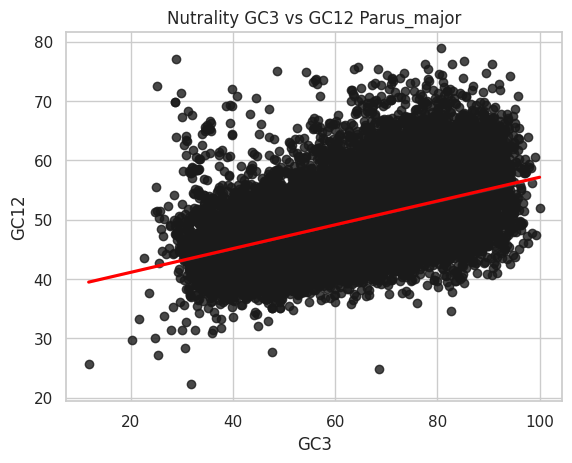

In [ ]:
sns.regplot(x='GC3', y='GC12', data=combined_df[combined_df['Species'] == 'Cyprinus_Carpio'],color = 'k', line_kws={'color': 'red'})
plt.title("Nutrality GC3 vs GC12 Cyprinus_Carpio")
plt.show()

sns.regplot(x='GC3', y='GC12', data=combined_df[combined_df['Species'] == 'Rattus_Norvegicus'],color = 'k', line_kws={'color': 'red'})
plt.title("Nutrality GC3 vs GC12 Rattus_Norvegicus")
plt.show()

sns.regplot(x='GC3', y='GC12', data=combined_df[combined_df['Species'] == 'Parus_major'],color = 'k', line_kws={'color': 'red'})
plt.title("Nutrality GC3 vs GC12 Parus_major")
plt.show()

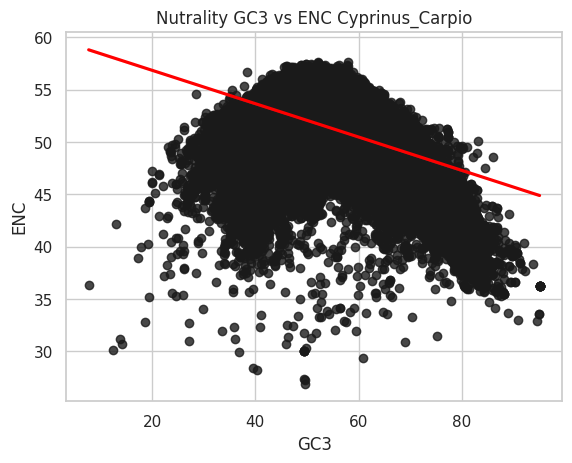

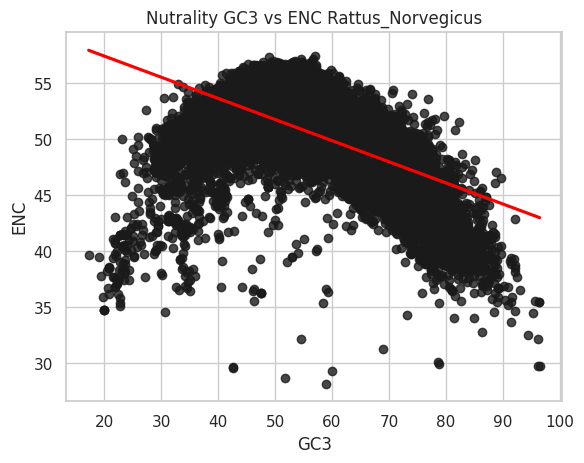

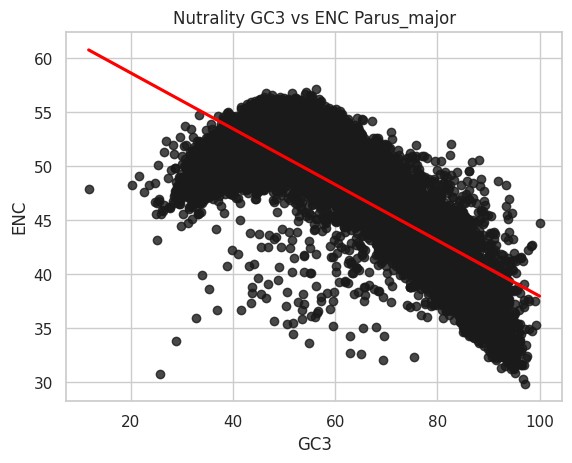

In [ ]:
sns.regplot(x='GC3', y='ENC', data=combined_df[combined_df['Species'] == 'Cyprinus_Carpio'],color = 'k', line_kws={'color': 'red'})
plt.title("Nutrality GC3 vs ENC Cyprinus_Carpio")
plt.show()

sns.regplot(x='GC3', y='ENC', data=combined_df[combined_df['Species'] == 'Rattus_Norvegicus'],color = 'k', line_kws={'color': 'red'})
plt.title("Nutrality GC3 vs ENC Rattus_Norvegicus")
plt.show()

sns.regplot(x='GC3', y='ENC', data=combined_df[combined_df['Species'] == 'Parus_major'],color = 'k', line_kws={'color': 'red'})
plt.title("Nutrality GC3 vs ENC Parus_major")
plt.show()

# Generate Box Plot
Here I have created box plot of all species together for three differnt species and there are different diagrams for all differnt columns which can be seen below.

<ipython-input-78-29c771e64e6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='GC%', data=data, palette="Set3")


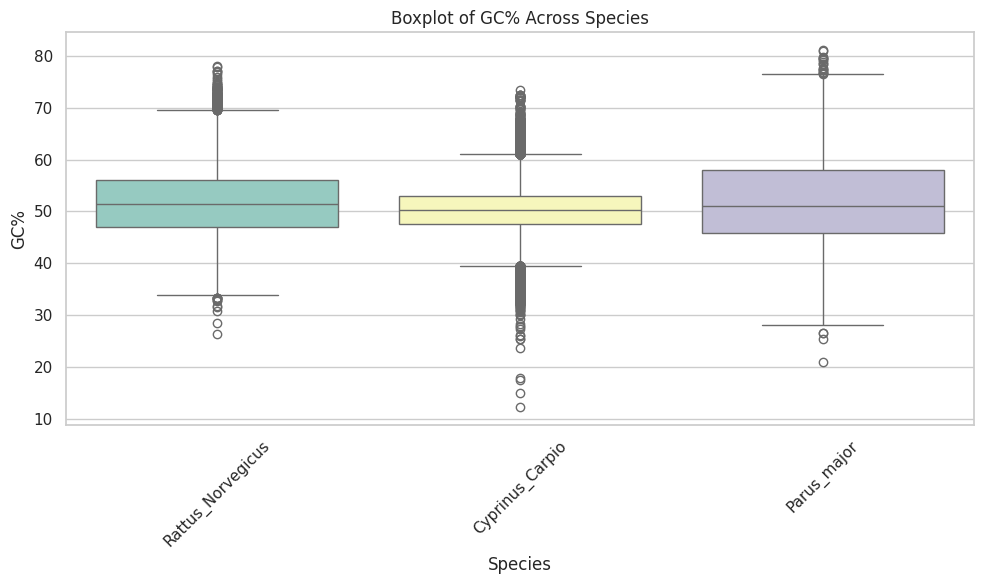

In [ ]:
data = combined_df[['Species', 'GC%']]
sns.set(style="whitegrid")
# Create the boxplot for GC% across all species
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='GC%', data=data, palette="Set3")
plt.title('Boxplot of GC% Across Species')
plt.xlabel('Species')
plt.ylabel('GC%')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-79-7627ee26e0f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='cds length (bp)', data=data, palette="Set3")


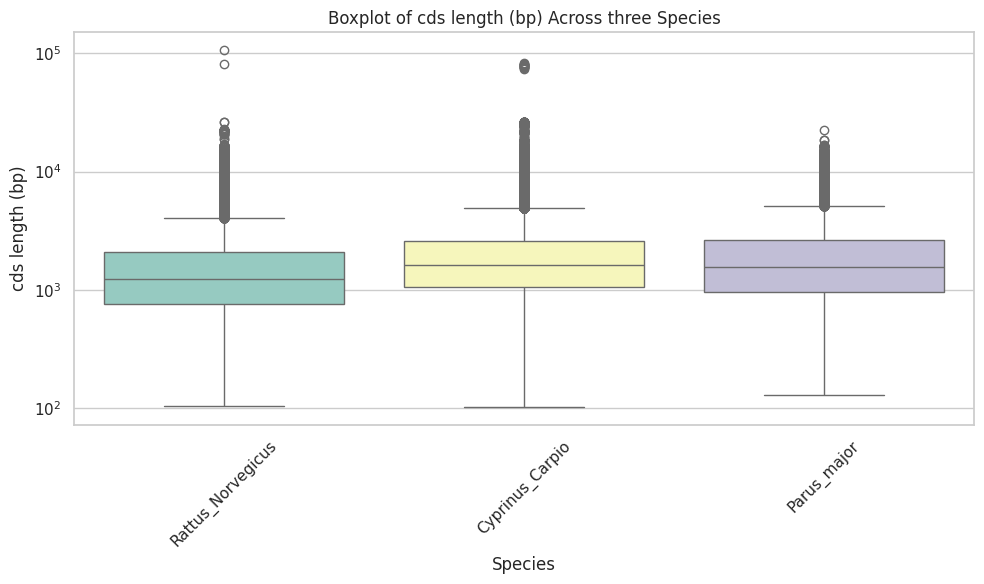

In [ ]:
data = combined_df[['Species', 'cds length (bp)']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='cds length (bp)', data=data, palette="Set3")
plt.yscale('log') # Log transformation of y axis
plt.title('Boxplot of cds length (bp) Across three Species')
plt.xlabel('Species')
plt.ylabel('cds length (bp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-80-efb292cbb102>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='GC1', data=data, palette="Set3")


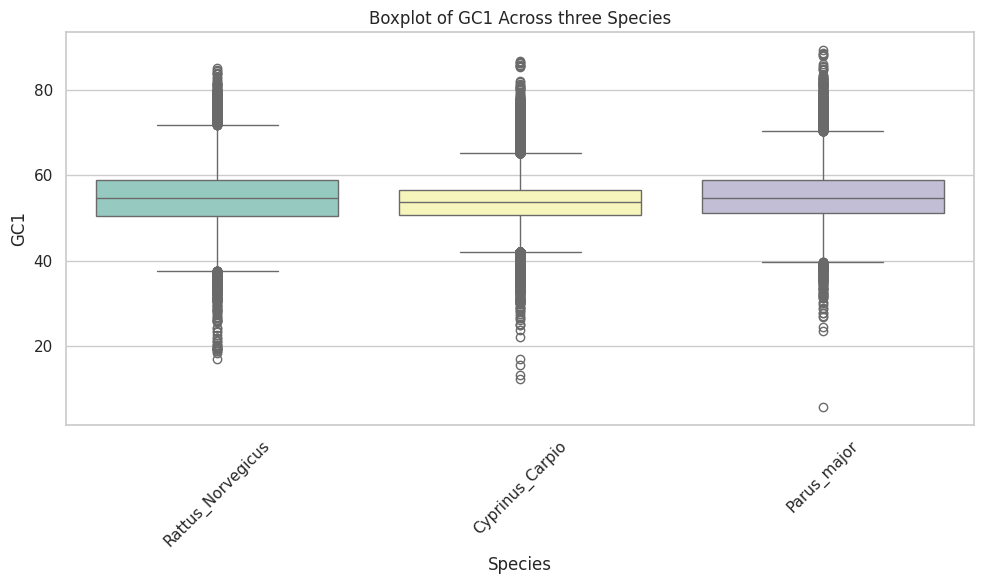

In [ ]:
data = combined_df[['Species', 'GC1']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='GC1', data=data, palette="Set3")
plt.title('Boxplot of GC1 Across three Species')
plt.xlabel('Species')
plt.ylabel('GC1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-81-5f9386503f44>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='GC2', data=data, palette="Set3")


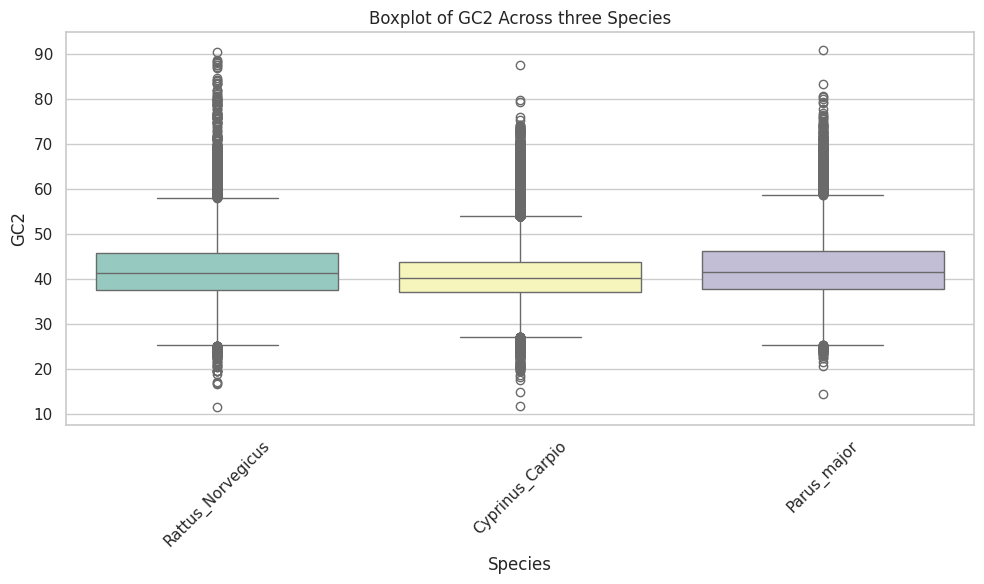

In [ ]:
data = combined_df[['Species', 'GC2']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='GC2', data=data, palette="Set3")
plt.title('Boxplot of GC2 Across three Species')
plt.xlabel('Species')
plt.ylabel('GC2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-82-284a96e8bc42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='GC3', data=data, palette="Set3")


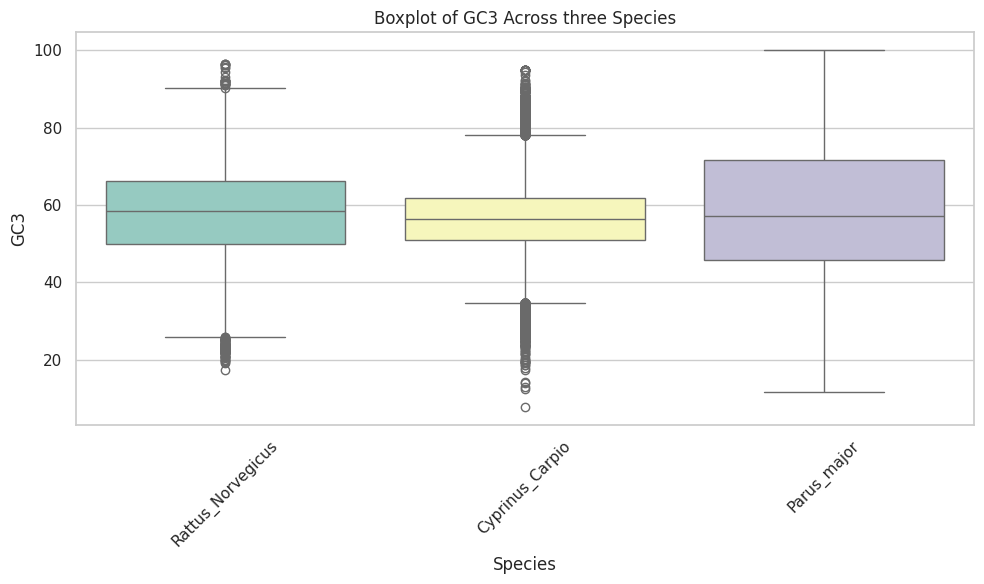

In [ ]:
data = combined_df[['Species', 'GC3']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='GC3', data=data, palette="Set3")
plt.title('Boxplot of GC3 Across three Species')
plt.xlabel('Species')
plt.ylabel('GC3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-83-58abb379735d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='ENC', data=data, palette="Set3")


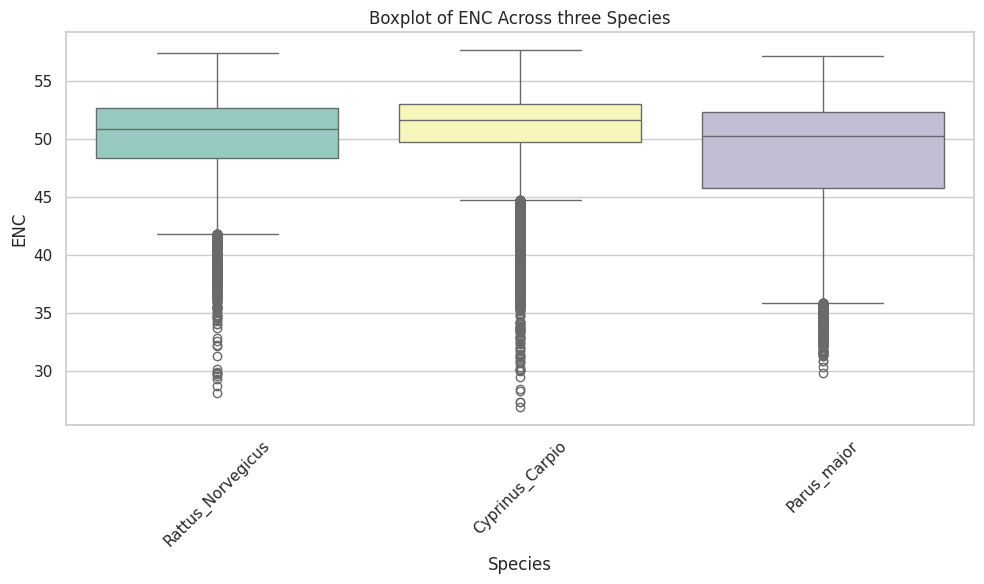

In [ ]:
data = combined_df[['Species', 'ENC']]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='ENC', data=data, palette="Set3")
plt.title('Boxplot of ENC Across three Species')
plt.xlabel('Species')
plt.ylabel('ENC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Clustering
Finally I am using RandomForest clustering approach to do the clustering on species and at the end I have extracted the importance of features after finding them I have created a scatter plot below.

In [ ]:
# Encode 'Species' column into numeric values (for classification)
label_encoder = LabelEncoder()
combined_df['Species_encoded'] = label_encoder.fit_transform(combined_df['Species'])

# Features (excluding 'Species' and 'Species_encoded')
features = ['cds length (bp)', 'GC%', 'ENC', 'CAI', 'GC1', 'GC2', 'GC3']
X = combined_df[features]
y = combined_df['Species_encoded']

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importances:")
print(importance_df)

# The top 2 features
top_2_features = importance_df['Feature'].head(2).tolist()
print(f"\nTop 2 Features: {top_2_features}")


Feature Importances:
           Feature  Importance
1              GC%    0.184515
6              GC3    0.178445
0  cds length (bp)    0.167093
2              ENC    0.162973
4              GC1    0.159633
5              GC2    0.147342
3              CAI    0.000000

Top 2 Features: ['GC%', 'GC3']


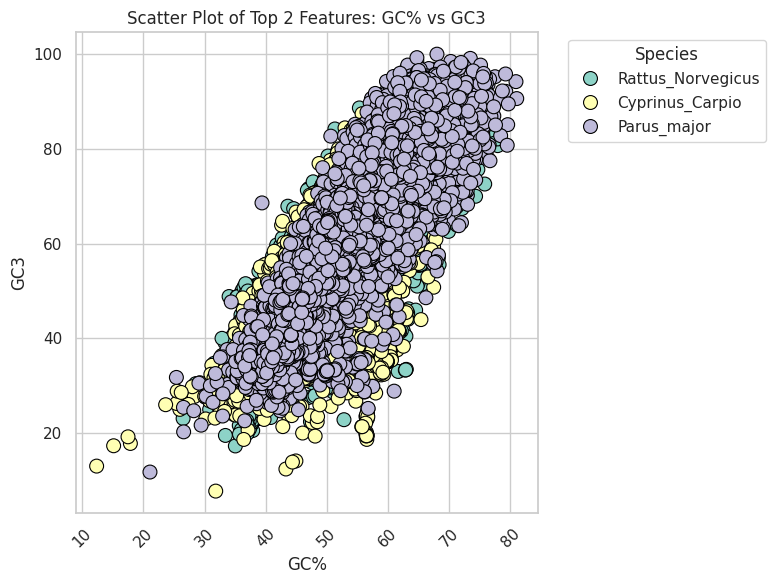

In [ ]:
# Create scatter plot using the two most important features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df,x=top_2_features[0], y=top_2_features[1], hue='Species', palette='Set3', s=100, edgecolor='black')
plt.title(f'Scatter Plot of Top 2 Features: {top_2_features[0]} vs {top_2_features[1]}')
plt.xlabel(top_2_features[0])
plt.ylabel(top_2_features[1])
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
X1 = combined_df[['GC%', 'GC3', 'ENC']]
X1 = np.array(X1)

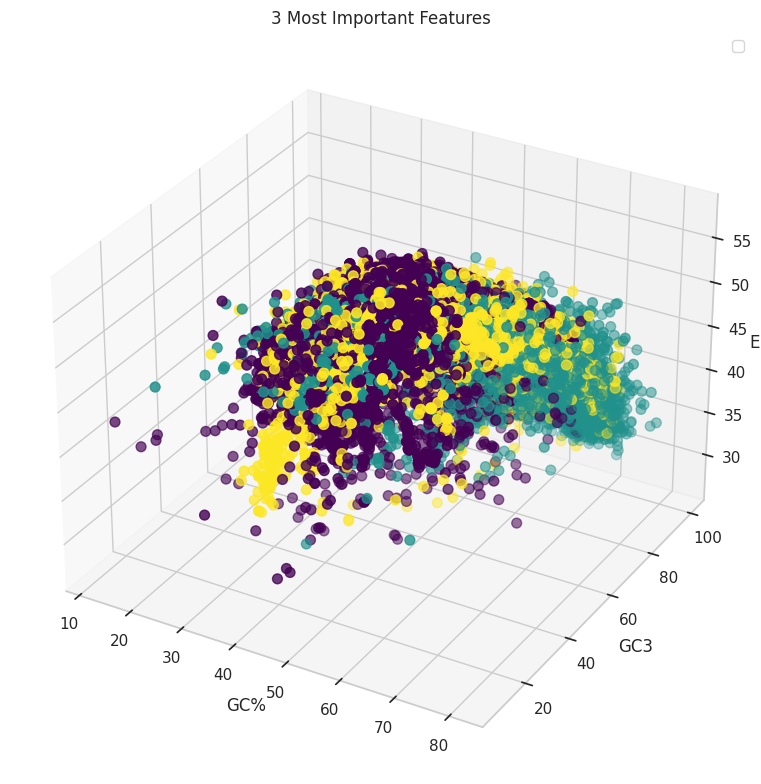

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=y, cmap='viridis', s=50)
ax.set_xlabel('GC%')
ax.set_ylabel('GC3')
ax.set_zlabel('ENC')
plt.title('3 Most Important Features')
plt.tight_layout()
plt.legend()
plt.show()